In [647]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inLine
import seaborn as sns
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.tools.eval_measures as em
from sklearn.metrics import  mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from IPython.display import display

##  1. Read the data as an appropriate timeseries data and plot the data

In [648]:
df=pd.read_csv("Shoe Sales.csv")

In [649]:
#display max columns
pd.options.display.max_columns=50

In [650]:
#display top 5 
df.head()

,YearMonth,Shoe_Sales
0,1980-01,85
1,1980-02,89
2,1980-03,109
3,1980-04,95
4,1980-05,91


In [651]:
#display tail 5
df.tail()

,YearMonth,Shoe_Sales
182,1995-03,188
183,1995-04,195
184,1995-05,189
185,1995-06,220
186,1995-07,274


In [652]:
#copying the dataset
df_copy = df.copy()

In [653]:
#transforming date column to datetime
df['YearMonth'] = pd.to_datetime(df['YearMonth'])

In [654]:
#information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   YearMonth   187 non-null    datetime64[ns]
 1   Shoe_Sales  187 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.1 KB


In [655]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   YearMonth   187 non-null    datetime64[ns]
 1   Shoe_Sales  187 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.1 KB


In [656]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Shoe_Sales,187.0,245.636364,121.390804,85.0,143.5,220.0,315.5,662.0


### Feature Extraction

In [657]:
df_copy['Year'] = df.YearMonth.dt.year
df_copy['Month'] = df.YearMonth.dt.month

In [658]:
df_copy.head()

,YearMonth,Shoe_Sales,Year,Month
0,1980-01,85,1980,1
1,1980-02,89,1980,2
2,1980-03,109,1980,3
3,1980-04,95,1980,4
4,1980-05,91,1980,5


In [659]:
#setting index for TimeSeries Analysis
df=df.set_index('YearMonth')

In [660]:
df.head()

,Shoe_Sales
YearMonth,
1980-01-01,85
1980-02-01,89
1980-03-01,109
1980-04-01,95
1980-05-01,91


### Missing Values

In [661]:
df.isnull().sum()

Shoe_Sales    0
dtype: int64

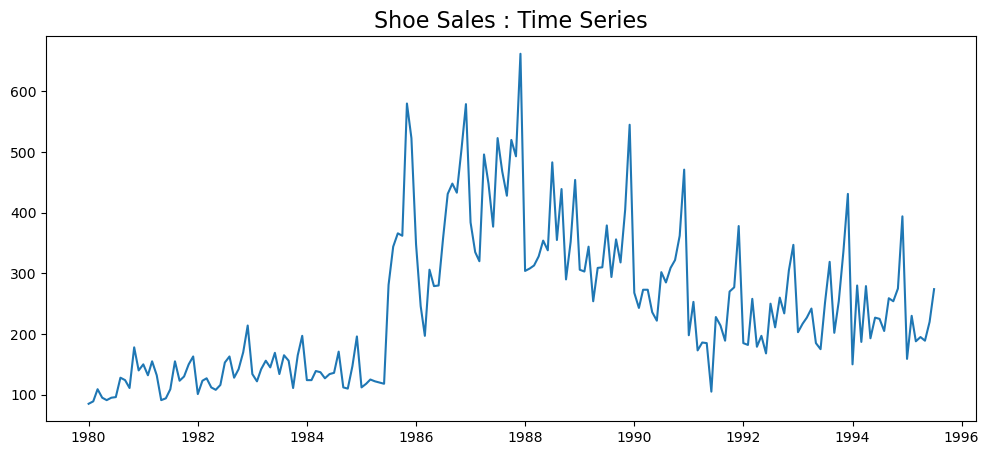

In [662]:
rcParams['figure.figsize'] = 12,5
plt.title('Shoe Sales : Time Series', fontsize=16)
plt.plot(df);

# 2. Exploratory Data Analysis

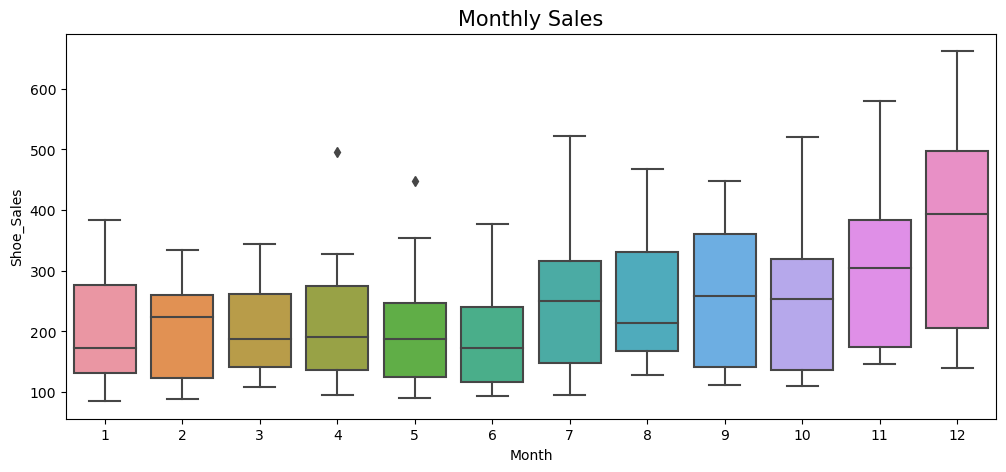

In [663]:
plt.title('Monthly Sales', fontsize=15)
sns.boxplot(data=df_copy, x='Month', y='Shoe_Sales');

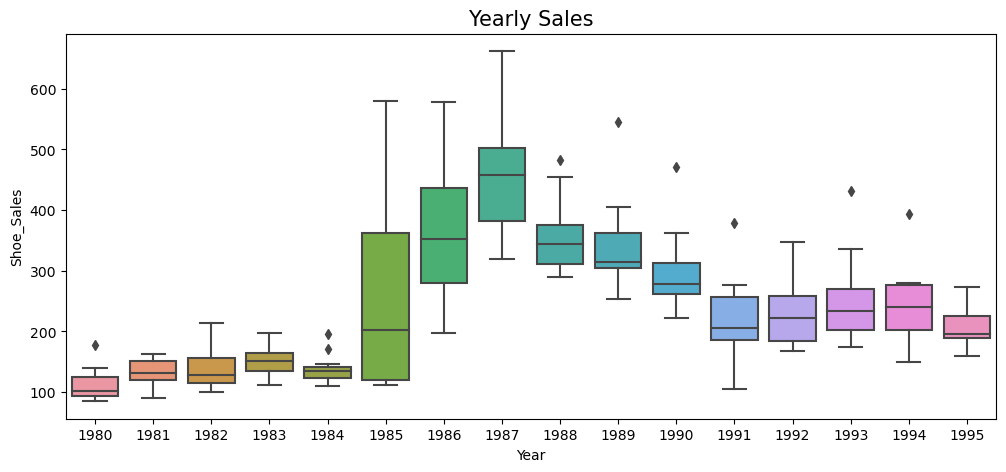

In [664]:
plt.title('Yearly Sales', fontsize=15)
sns.boxplot(data=df_copy, x='Year', y='Shoe_Sales');

### Decomposition

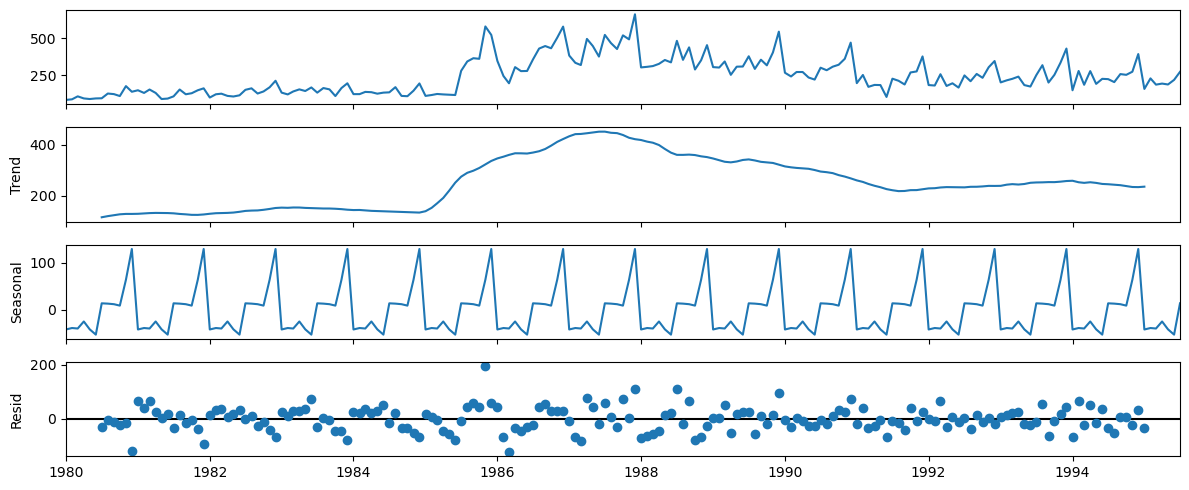

In [665]:
#additive decomposition
result = seasonal_decompose(df, model='additive', period=12)
result.plot()
plt.show()

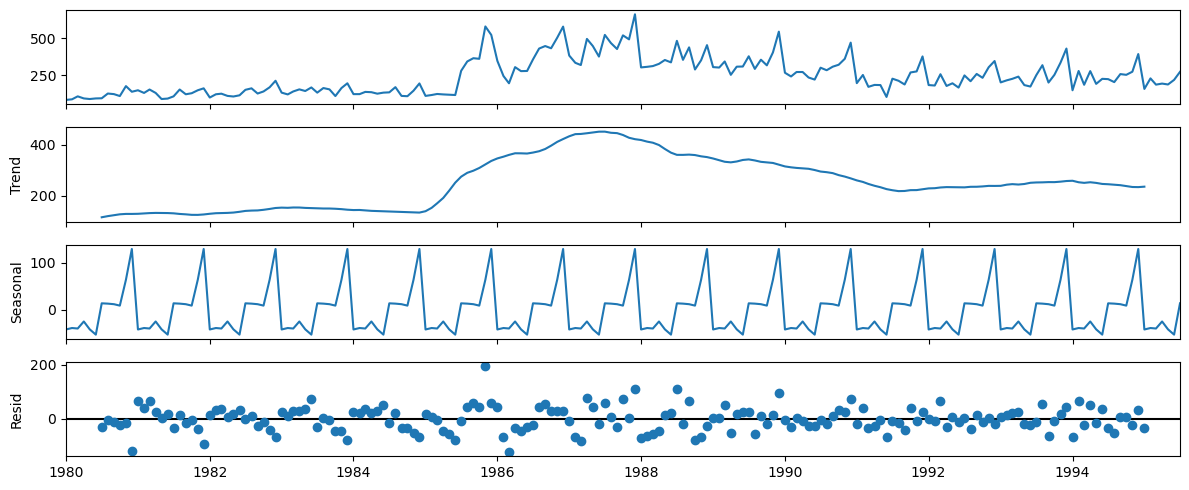

In [666]:
#multiplicative decomposition
result = seasonal_decompose(df, model='additive', period=12)
result.plot()
plt.show()

# 3. Spliting the data into train and test

In [667]:
# Split data into training and testing sets
train_data = df[df.index <'1991']
test_data = df[df.index > '1991']

print("Training Data:")
print(train_data.head())
print("Shape:", train_data.shape)
print("\nTesting Data:")
print(test_data.head())
print("Shape:", test_data.shape)

Training Data:
            Shoe_Sales
YearMonth             
1980-01-01          85
1980-02-01          89
1980-03-01         109
1980-04-01          95
1980-05-01          91
Shape: (132, 1)

Testing Data:
            Shoe_Sales
YearMonth             
1991-02-01         253
1991-03-01         173
1991-04-01         186
1991-05-01         185
1991-06-01         105
Shape: (54, 1)


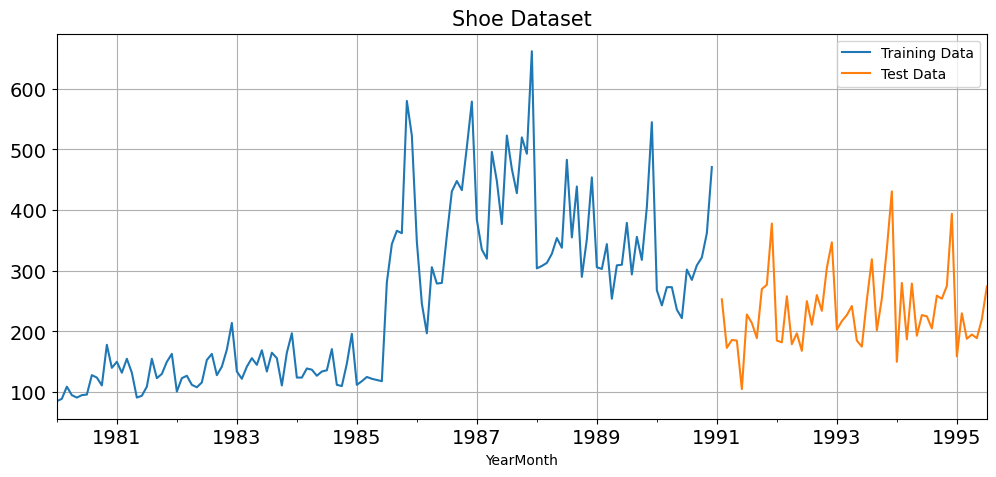

In [668]:
plt.title("Shoe Dataset", fontsize=15)
train_data['Shoe_Sales'].plot(fontsize=14)
test_data['Shoe_Sales'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data', 'Test Data'])
plt.show()

# 4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models, simple average models etc should also be built on the training data and check the performance on the test data using RMSE.

In [669]:
#copying the dataset for Linear Regression

#Shoe Dataset
df_train = train_data.copy()
df_test = test_data.copy()

In [670]:
train_time = [i+1 for i in range(len(train_data))]
test_time = [i+133 for i in range(len(test_data))]

In [671]:
#Adding an column of LinearRegression Time

#Shoe Dataset
df_train['time'] = train_time
df_test['time'] = test_time

### LinearRegression

In [672]:
#Linear Regression
lr = LinearRegression()

In [673]:
#fitting linear Regression for Shoe Sales Data
lr.fit (df_train[['time']], df_train['Shoe_Sales'])

LinearRegression()

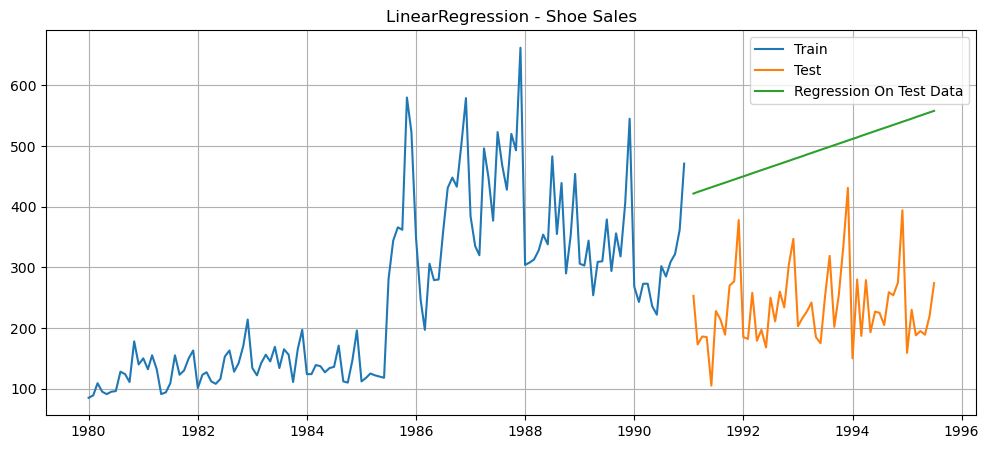

In [674]:
#LinearRegression on Shoe Sales 
train_prediction = lr.predict(df_train[['time']])
df_train['RegOnTime'] = train_prediction

test_prediction = lr.predict(df_test[['time']])
df_test['RegOnTime'] = test_prediction

plt.title('LinearRegression - Shoe Sales')
plt.plot(train_data['Shoe_Sales'], label='Train')
plt.plot(test_data['Shoe_Sales'], label='Test')
plt.plot(df_test['RegOnTime'], label='Regression On Test Data')

plt.legend(loc='best')
plt.grid();

In [675]:
df_rmse = {}

In [676]:
df_rmse = mean_squared_error(df_test['Shoe_Sales'],test_prediction,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(df_rmse))

For RegressionOnTime forecast on the Test Data,  RMSE is 264.517 


In [677]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [678]:
mape = mean_absolute_percentage_error(df_test['Shoe_Sales'], test_prediction)
mape

122.14075782294853

In [679]:
resultsDf = pd.DataFrame({'Test RMSE': [df_rmse], 'MAPE':[mape]},index=['LinearRegression'])
resultsDf

,Test RMSE,MAPE
LinearRegression,264.516794,122.140758


### Naive Bayes Model

In [680]:
df_train = train_data.copy()
df_test = test_data.copy()

In [681]:
df_nb= np.asarray(df_train)
shoe_y_hat = pd.DataFrame(df_test)
shoe_y_hat['naive'] = np.asarray(df_train['Shoe_Sales'])[len(np.asarray(df_train['Shoe_Sales']))-1]

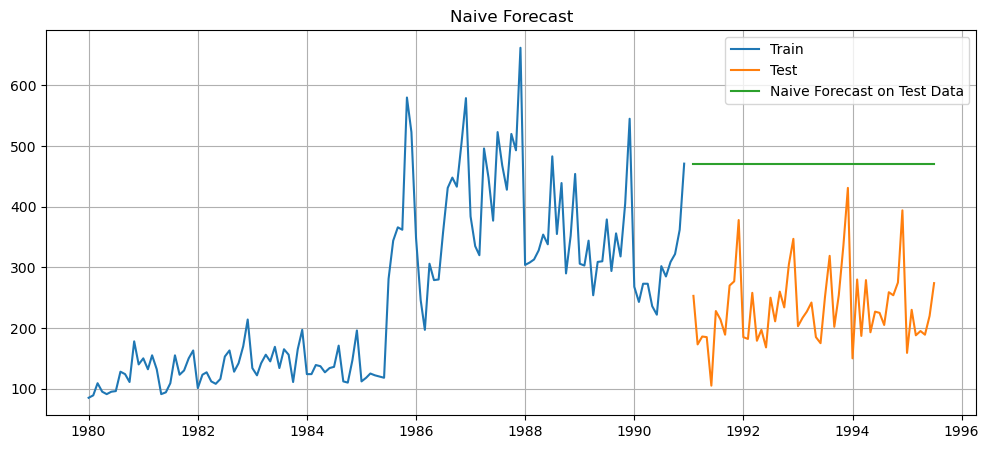

In [682]:
plt.plot(df_train['Shoe_Sales'], label='Train')
plt.plot(df_test['Shoe_Sales'], label='Test')

plt.plot(shoe_y_hat['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [683]:
df_rmse = mean_squared_error(df_test['Shoe_Sales'],shoe_y_hat['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(df_rmse))

For RegressionOnTime forecast on the Test Data,  RMSE is 244.575 


In [684]:
mape = mean_absolute_percentage_error(df_test['Shoe_Sales'], shoe_y_hat['naive'])
mape

114.44350513279709

In [685]:
resultsDf2 = pd.DataFrame({'Test RMSE': [df_rmse], 'MAPE':[mape]},index=['NaiveBayes'])
resultsDf = pd.concat([resultsDf, resultsDf2])
resultsDf

,Test RMSE,MAPE
LinearRegression,264.516794,122.140758
NaiveBayes,244.575066,114.443505


### Simple Moving Average Model

In [686]:
df_train = train_data.copy()
df_test = test_data.copy()

In [687]:
df_test['mean_forecast'] = df_test['Shoe_Sales'].mean()
df_test.head()

,Shoe_Sales,mean_forecast
YearMonth,,
1991-02-01,253,234.444444
1991-03-01,173,234.444444
1991-04-01,186,234.444444
1991-05-01,185,234.444444
1991-06-01,105,234.444444


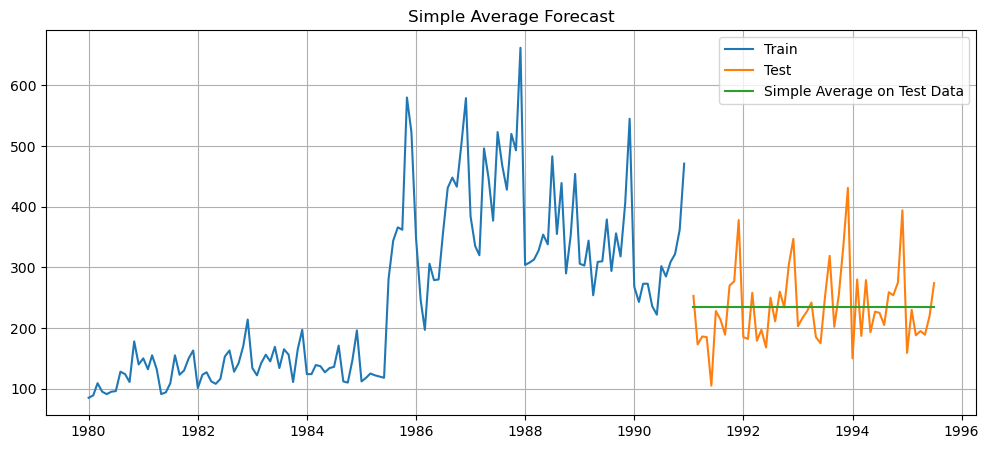

In [688]:
plt.plot(df_train['Shoe_Sales'], label='Train')
plt.plot(df_test['Shoe_Sales'], label='Test')

plt.plot(df_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [689]:
df_rmse = mean_squared_error(df_test['Shoe_Sales'],df_test['mean_forecast'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(df_rmse))

For RegressionOnTime forecast on the Test Data,  RMSE is 62.116 


In [690]:
mape = mean_absolute_percentage_error(df_test['Shoe_Sales'], df_test['mean_forecast'])
mape

21.327010862791862

In [691]:
resultsDf2 = pd.DataFrame({'Test RMSE': [df_rmse], 'MAPE':[mape]},index=['SimpleAverage'])
resultsDf = pd.concat([resultsDf, resultsDf2])
resultsDf

,Test RMSE,MAPE
LinearRegression,264.516794,122.140758
NaiveBayes,244.575066,114.443505
SimpleAverage,62.116279,21.327011


### MovingAverage Model

In [692]:
df_MA=df.copy()

In [693]:
df_MA['Trailing_2'] = df_MA['Shoe_Sales'].rolling(2).mean()
df_MA['Trailing_4'] = df_MA['Shoe_Sales'].rolling(4).mean()
df_MA['Trailing_6'] = df_MA['Shoe_Sales'].rolling(6).mean()
df_MA['Trailing_9'] = df_MA['Shoe_Sales'].rolling(9).mean()

df_MA.head()

,Shoe_Sales,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,85,NaN,NaN,NaN,NaN
1980-02-01,89,87.0,NaN,NaN,NaN
1980-03-01,109,99.0,NaN,NaN,NaN
1980-04-01,95,102.0,94.5,NaN,NaN
1980-05-01,91,93.0,96.0,NaN,NaN


In [694]:
# Split data into training and testing sets
df_train = df_MA[df_MA.index <'1991']
df_test = df_MA[df_MA.index > '1991']

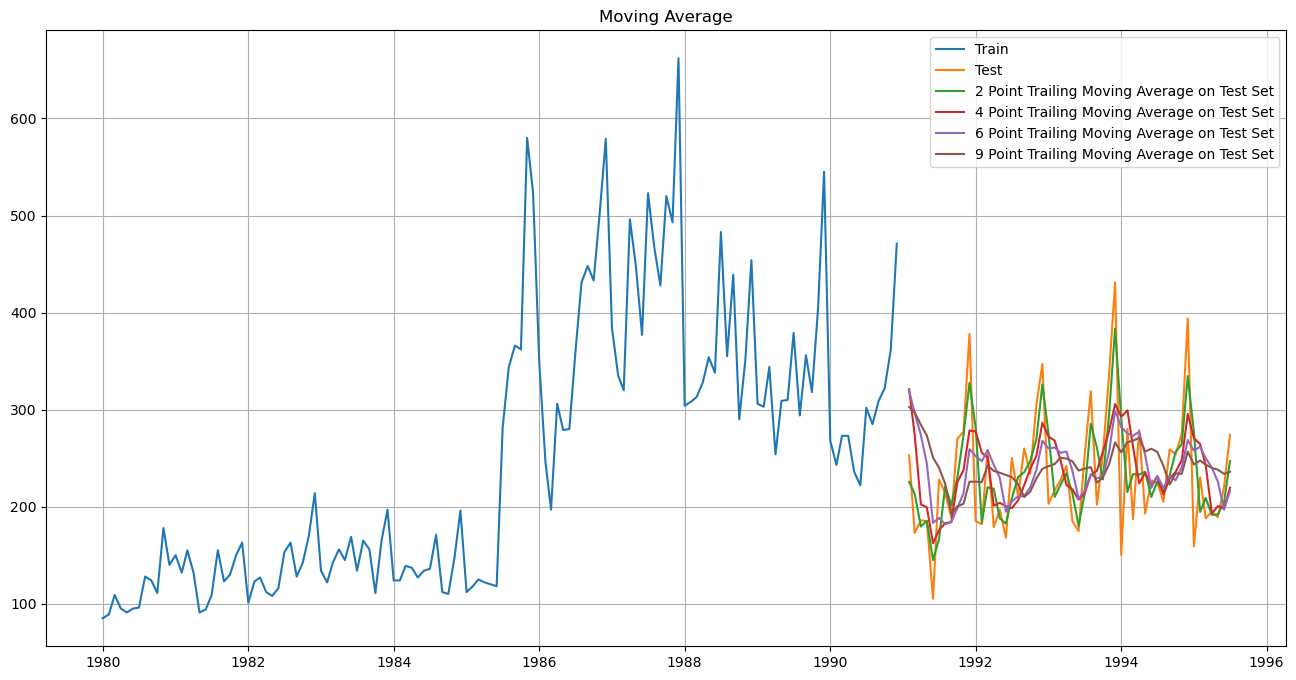

In [695]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(df_train['Shoe_Sales'], label='Train')
plt.plot(df_test['Shoe_Sales'], label='Test')


plt.plot(df_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(df_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(df_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(df_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.title('Moving Average')
plt.legend(loc = 'best')
plt.grid();

In [696]:
## Test Data - RMSE  --> 2 point Trailing MA
df_rmse = mean_squared_error(df_test['Shoe_Sales'],df_test['Trailing_2'],squared=False)

In [697]:
mape = mean_absolute_percentage_error(df_test['Shoe_Sales'], df_test['Trailing_2'])
mape

14.787481812540056

In [698]:
resultsDf2 = pd.DataFrame({'Test RMSE': [df_rmse], 'MAPE':[mape]},index=['Trailing_2'])
resultsDf = pd.concat([resultsDf, resultsDf2])
resultsDf

,Test RMSE,MAPE
LinearRegression,264.516794,122.140758
NaiveBayes,244.575066,114.443505
SimpleAverage,62.116279,21.327011
Trailing_2,42.489323,14.787482


In [699]:
## Test Data - RMSE  --> 4 point Trailing MA
df_rmse = mean_squared_error(df_test['Shoe_Sales'],df_test['Trailing_4'],squared=False)

In [700]:
mape = mean_absolute_percentage_error(df_test['Shoe_Sales'], df_test['Trailing_4'])

In [701]:
resultsDf2 = pd.DataFrame({'Test RMSE': [df_rmse], 'MAPE':[mape]},index=['Trailing_4'])
resultsDf = pd.concat([resultsDf, resultsDf2])
resultsDf

,Test RMSE,MAPE
LinearRegression,264.516794,122.140758
NaiveBayes,244.575066,114.443505
SimpleAverage,62.116279,21.327011
Trailing_2,42.489323,14.787482
Trailing_4,55.199732,19.835338


In [702]:
## Test Data - RMSE  --> 6 point Trailing MA
df_rmse = mean_squared_error(df_test['Shoe_Sales'],df_test['Trailing_6'],squared=False)
mape = mean_absolute_percentage_error(df_test['Shoe_Sales'], df_test['Trailing_6'])

resultsDf2 = pd.DataFrame({'Test RMSE': [df_rmse], 'MAPE':[mape]},index=['Trailing_6'])
resultsDf = pd.concat([resultsDf, resultsDf2])
resultsDf

,Test RMSE,MAPE
LinearRegression,264.516794,122.140758
NaiveBayes,244.575066,114.443505
SimpleAverage,62.116279,21.327011
Trailing_2,42.489323,14.787482
Trailing_4,55.199732,19.835338
Trailing_6,61.684757,23.269147


In [703]:
## Test Data - RMSE  --> 9 point Trailing MA
df_rmse = mean_squared_error(df_test['Shoe_Sales'],df_test['Trailing_9'],squared=False)
mape = mean_absolute_percentage_error(df_test['Shoe_Sales'], df_test['Trailing_9'])

resultsDf2 = pd.DataFrame({'Test RMSE': [df_rmse], 'MAPE':[mape]},index=['Trailing_9'])
resultsDf = pd.concat([resultsDf, resultsDf2])
resultsDf

,Test RMSE,MAPE
LinearRegression,264.516794,122.140758
NaiveBayes,244.575066,114.443505
SimpleAverage,62.116279,21.327011
Trailing_2,42.489323,14.787482
Trailing_4,55.199732,19.835338
Trailing_6,61.684757,23.269147
Trailing_9,66.901505,24.726947


### Simple Exponential Smoothing

In [704]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 

In [705]:
df_train=train_data.copy()
df_test=test_data.copy()

In [706]:
# create class
model_SES = SimpleExpSmoothing(df_train,initialization_method='estimated')

C:\Users\Sourav Maity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [707]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [708]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.6050497040551455,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 88.83023140449214,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [709]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(df_test))
SES_predict.head()

1991-01-01    420.229931
1991-02-01    420.229931
1991-03-01    420.229931
1991-04-01    420.229931
1991-05-01    420.229931
Freq: MS, dtype: float64

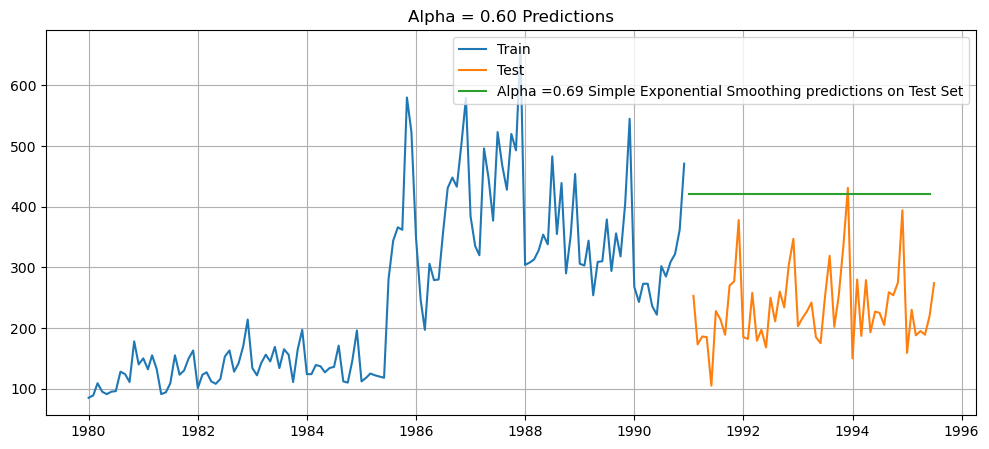

In [710]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(df_train, label='Train')
plt.plot(df_test, label='Test')

plt.plot(SES_predict, label='Alpha =0.69 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.60 Predictions');

In [711]:
#rmse
df_rmse = mean_squared_error(df_test['Shoe_Sales'],SES_predict,squared=False)
mape = mean_absolute_percentage_error(df_test['Shoe_Sales'], SES_predict)

resultsDf2 = pd.DataFrame({'Test RMSE': [df_rmse], 'MAPE':[mape]},index=['SES'])
resultsDf = pd.concat([resultsDf, resultsDf2])
resultsDf

,Test RMSE,MAPE
LinearRegression,264.516794,122.140758
NaiveBayes,244.575066,114.443505
SimpleAverage,62.116279,21.327011
Trailing_2,42.489323,14.787482
Trailing_4,55.199732,19.835338
Trailing_6,61.684757,23.269147
Trailing_9,66.901505,24.726947
SES,195.894561,91.420744


### Holt - ETS(A, A, N) - Holt's linear method with additive errors

#### Double Exponential Smoothing

In [712]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(df_train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.5943314391906757, 'smoothing_trend': 0.00027787091232455, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 82.93344323857725, 'initial_trend': 3.3090201712784832, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Sourav Maity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [713]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(df_test))
DES_predict.head()

1991-01-01    424.071665
1991-02-01    427.353709
1991-03-01    430.635753
1991-04-01    433.917797
1991-05-01    437.199841
Freq: MS, dtype: float64

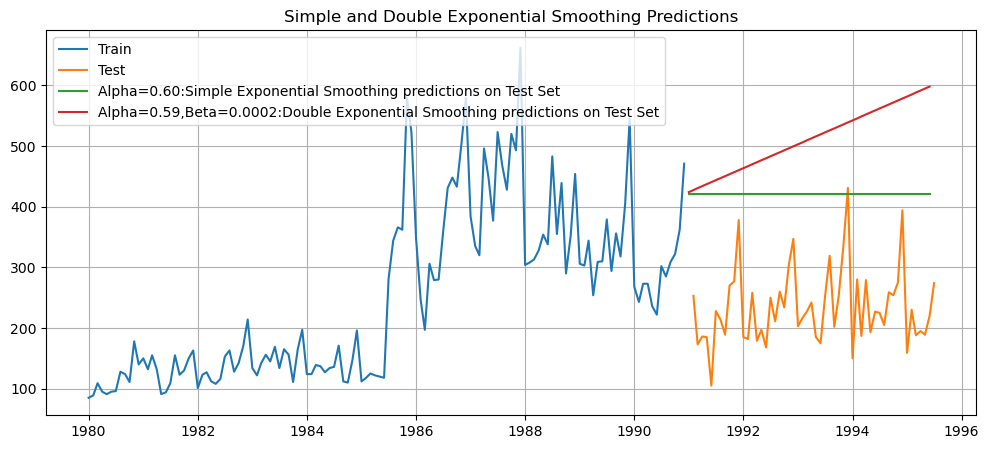

In [714]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(df_train, label='Train')
plt.plot(df_test, label='Test')

plt.plot(SES_predict, label='Alpha=0.60:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.59,Beta=0.0002:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [715]:
#rmse
df_rmse = mean_squared_error(df_test['Shoe_Sales'],DES_predict,squared=False)
mape = mean_absolute_percentage_error(df_test['Shoe_Sales'], DES_predict)

resultsDf2 = pd.DataFrame({'Test RMSE': [df_rmse], 'MAPE':[mape]},index=['DES'])
resultsDf = pd.concat([resultsDf, resultsDf2])
resultsDf

,Test RMSE,MAPE
LinearRegression,264.516794,122.140758
NaiveBayes,244.575066,114.443505
SimpleAverage,62.116279,21.327011
Trailing_2,42.489323,14.787482
Trailing_4,55.199732,19.835338
Trailing_6,61.684757,23.269147
Trailing_9,66.901505,24.726947
SES,195.894561,91.420744
DES,286.467010,131.556013


### Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

In [716]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(df_train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.5707142857142857, 'smoothing_trend': 0.0001, 'smoothing_seasonal': 0.29372180451127816, 'damping_trend': nan, 'initial_level': 116.47499999999994, 'initial_trend': 1.6939393939394014, 'initial_seasons': array([-11.20138889, -14.06597222,   1.11111111,  -5.25347222,
       -21.42013889, -11.18055556, -10.83680556,  18.14236111,
        -2.53472222, -12.53472222,  28.90277778,  40.87152778]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Sourav Maity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [717]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(df_test))
TES_predict.head()

1991-01-01    219.083658
1991-02-01    213.816321
1991-03-01    246.658224
1991-04-01    267.260236
1991-05-01    287.719744
Freq: MS, dtype: float64

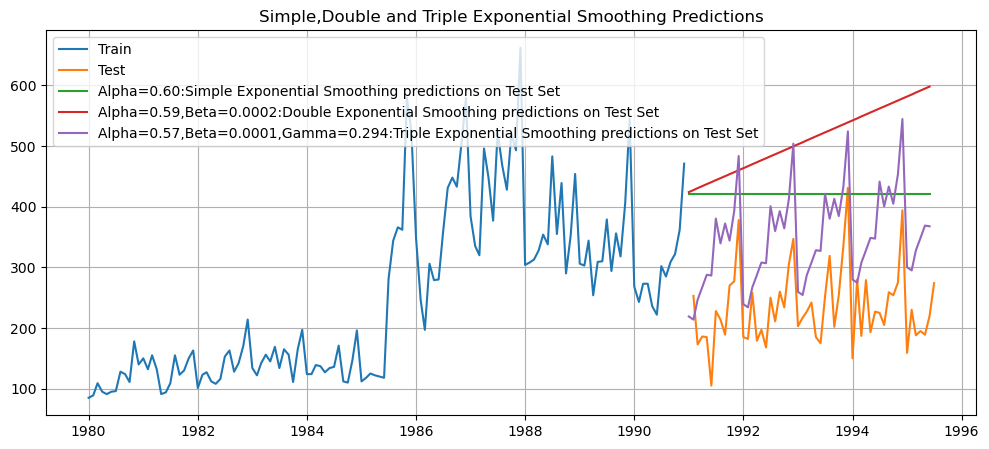

In [718]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(df_train, label='Train')
plt.plot(df_test, label='Test')

plt.plot(SES_predict, label='Alpha=0.60:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.59,Beta=0.0002:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.57,Beta=0.0001,Gamma=0.294:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [719]:
#rmse
df_rmse = mean_squared_error(df_test['Shoe_Sales'],TES_predict,squared=False)
mape = mean_absolute_percentage_error(df_test['Shoe_Sales'], TES_predict)

resultsDf2 = pd.DataFrame({'Test RMSE': [df_rmse], 'MAPE':[mape]},index=['TES'])
resultsDf = pd.concat([resultsDf, resultsDf2])
resultsDf

,Test RMSE,MAPE
LinearRegression,264.516794,122.140758
NaiveBayes,244.575066,114.443505
SimpleAverage,62.116279,21.327011
Trailing_2,42.489323,14.787482
Trailing_4,55.199732,19.835338
Trailing_6,61.684757,23.269147
Trailing_9,66.901505,24.726947
SES,195.894561,91.420744
DES,286.467010,131.556013
TES,142.698275,57.907264


# 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.

In [720]:
from statsmodels.tsa.stattools import adfuller

In [721]:
dftest = adfuller(df,regression='ct')
print('DF test statistic (Shoe)is %3.3f' %dftest[0])
print('DF test p-value (Shoe)is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic (Shoe)is -1.577
DF test p-value (Shoe)is 0.8014186234536557
Number of lags used 13


We see that at 5% significant level the Time Series is non-stationary.

There are various ways that Python allows us to select the appropriate number of lags at which we check whether the Time Series is stationary. To know more about the how to select the various ways, please refer to the link over here
.

Let us take one level of differencing to see whether the series becomes stationary.

In [722]:
dftest = adfuller(df.diff().dropna(),regression='ct')
print('DF test statistic (Shoe)is %3.3f' %dftest[0])
print('DF test p-value (Shoe)is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic (Shoe)is -3.532
DF test p-value (Shoe)is 0.03611703400136099
Number of lags used 12


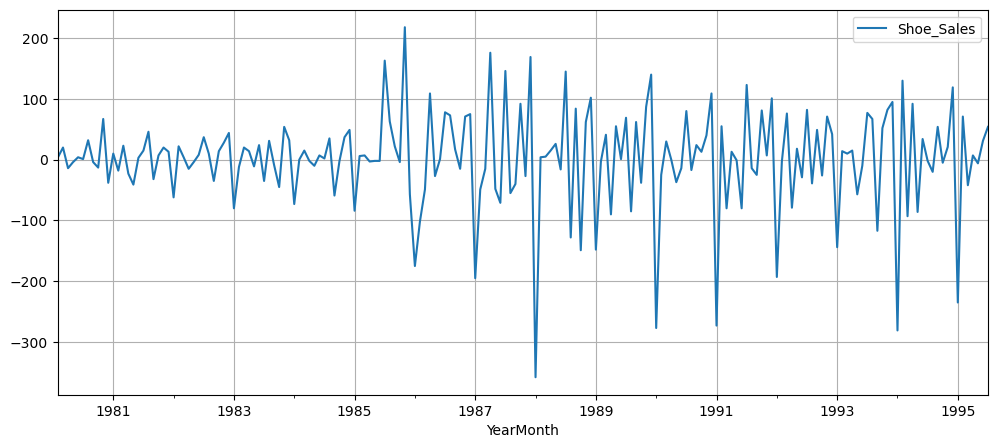

In [723]:
df.diff().dropna().plot(grid=True);

# 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### ARIMA

In [724]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [725]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [726]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train_data['Shoe_Sales'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:1508.2837722095962
ARIMA(0, 1, 1) - AIC:1497.050322418796
ARIMA(0, 1, 2) - AIC:1494.9646053663382
ARIMA(0, 1, 3) - AIC:1495.148473873875
ARIMA(1, 1, 0) - AIC:1501.6431242011804
ARIMA(1, 1, 1) - AIC:1492.4871865078985


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\2642777164.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\2642777164.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\2642777164.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\2642777164.py:8: FutureWarning: The frame

ARIMA(1, 1, 2) - AIC:1494.4238594575825
ARIMA(1, 1, 3) - AIC:1496.385878255889
ARIMA(2, 1, 0) - AIC:1498.9504830259475
ARIMA(2, 1, 1) - AIC:1494.4314983035233


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\2642777164.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\2642777164.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\2642777164.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\2642777164.py:8: FutureWarning: The frame

ARIMA(2, 1, 2) - AIC:1496.4107391803366


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\2642777164.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Sourav Maity\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\2642777164.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\2642777164.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fu

ARIMA(2, 1, 3) - AIC:1480.798463638843
ARIMA(3, 1, 0) - AIC:1498.930309422809
ARIMA(3, 1, 1) - AIC:1496.3468641049149
ARIMA(3, 1, 2) - AIC:1495.6558545472712


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\2642777164.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(3, 1, 3) - AIC:1479.687154766269


C:\Users\Sourav Maity\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\2642777164.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


In [727]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head(15)

,param,AIC
15,"(3, 1, 3)",1479.687155
11,"(2, 1, 3)",1480.798464
5,"(1, 1, 1)",1492.487187
6,"(1, 1, 2)",1494.423859
9,"(2, 1, 1)",1494.431498
2,"(0, 1, 2)",1494.964605
3,"(0, 1, 3)",1495.148474
14,"(3, 1, 2)",1495.655855
13,"(3, 1, 1)",1496.346864
7,"(1, 1, 3)",1496.385878


In [728]:
auto_ARIMA = ARIMA(train_data, order=(3,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\Sourav Maity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sourav Maity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sourav Maity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Shoe_Sales   No. Observations:                  132
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -732.844
Date:                Wed, 01 Nov 2023   AIC                           1479.687
Time:                        12:11:17   BIC                           1499.814
Sample:                    01-01-1980   HQIC                          1487.865
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5606      0.117      4.804      0.000       0.332       0.789
ar.L2         -1.0069      0.022    -45.238      0.000      -1.050      -0.963
ar.L3          0.5439      0.119      4.574      0.0

C:\Users\Sourav Maity\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


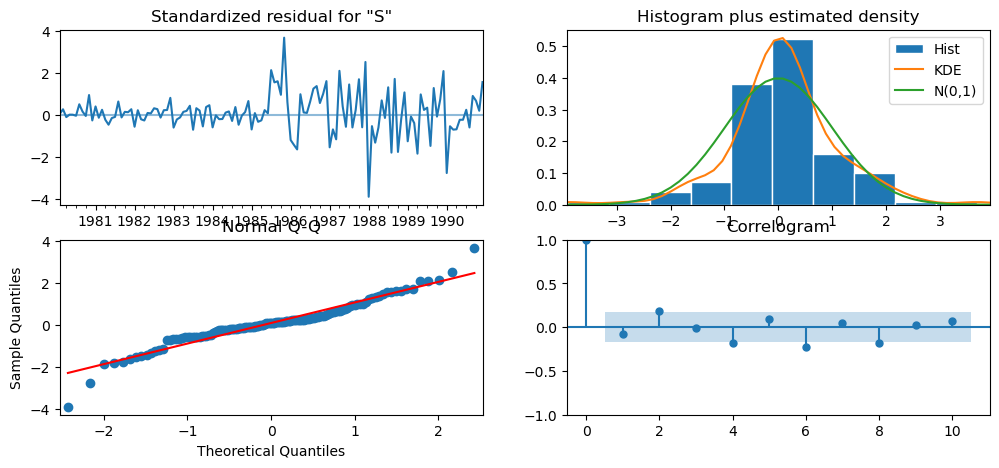

In [729]:
results_auto_ARIMA.plot_diagnostics();

In [730]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test_data))

In [731]:
rmse = mean_squared_error(test_data['Shoe_Sales'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test_data['Shoe_Sales'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 142.13626574100135 
MAPE: 64.286625090944


In [732]:
resultsDf1 = pd.DataFrame({'Test RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(3,1,3)'])

resultsDf = pd.concat([resultsDf, resultsDf1])
resultsDf

,Test RMSE,MAPE
LinearRegression,264.516794,122.140758
NaiveBayes,244.575066,114.443505
SimpleAverage,62.116279,21.327011
Trailing_2,42.489323,14.787482
Trailing_4,55.199732,19.835338
Trailing_6,61.684757,23.269147
Trailing_9,66.901505,24.726947
SES,195.894561,91.420744
DES,286.467010,131.556013
TES,142.698275,57.907264


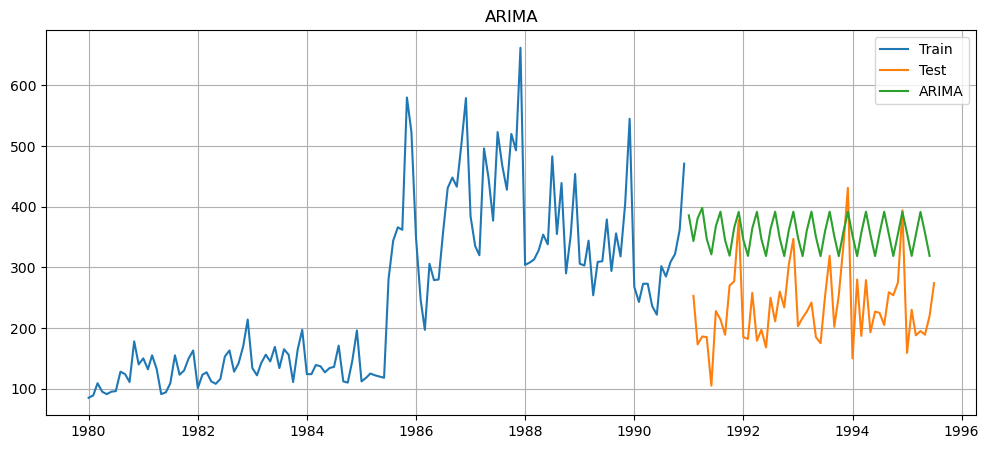

In [733]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(df_train, label='Train')
plt.plot(df_test, label='Test')

plt.plot(predicted_auto_ARIMA, label='ARIMA')


plt.legend(loc='best')
plt.grid()
plt.title('ARIMA');

### SARIMA

In [734]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [735]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [736]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_data['Shoe_Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1497.7788474019549
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1338.3663267373174


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1208.4142473347142
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1327.3970510547892
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1312.5867978686501


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1187.084399500935
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1201.0600831567197


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1200.754517442128


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1188.0396305010793
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1476.016777738224
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1318.3861206387692


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1185.484242614398
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1313.5738277003404
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1287.767566926179


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1164.2974585347451
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1188.1632556767738


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1188.20913719193


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1165.8757060498258
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1463.5451272121004
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1308.3453006661066


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:1177.0247487773709
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1315.5733347402786


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1279.6069439950597


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:1156.1654292793628


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1190.066349043626


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:1190.0436339223954


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:1157.7723133303953
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1491.1378318825623
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1331.4058144092062


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1197.5601940109602
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1303.2203127538983
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1296.8057138710692


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:1173.3867718168933
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:1177.1656900229468


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:1175.6619338112648


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:1175.0815891388936
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1471.86698717727
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1315.3261912470423


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:1186.003084241199
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1305.1955101698277


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1288.6795015086896


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:1165.1792553702837


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:1179.1583649856852


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:1177.606914003659


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:1166.9242913617456
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:1463.4445549649001


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1306.7163356175877


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:1176.2946246311944
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1306.1946944647393


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1280.3994898125334


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:1157.0825892936248


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:1180.682365210841


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:1179.6027997251224


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:1158.794177674968
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:1477.9194683056446
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1331.9353193748696


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:1199.1019589233917
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1295.2181640818894
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1288.6840148345768


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:1175.376482424364
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:1169.1269676598504


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:1167.3639775016811


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:1166.9191464403468
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:1473.8515321187924


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1316.7129215405794


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:1185.5196690090577
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1293.3419959529679


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1289.2967410618637


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1166.103014836484


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1168.666342596674


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1168.52087066942


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1167.6766922855772
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1464.1902793306267


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1308.203801654461


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1176.4764240716427


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1293.3977262846715


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1279.666110429125


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1158.4909996956007


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1169.962731426408


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:1170.0463662318182


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:1158.6303242214055


C:\Users\Sourav Maity\AppData\Local\Temp\2\ipykernel_34288\41126654.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


In [737]:
SARIMA_AIC.sort_values(by=['AIC']).head(10)

,param,seasonal,AIC
23,"(0, 1, 2)","(1, 0, 2, 12)",1156.165429
50,"(1, 1, 2)","(1, 0, 2, 12)",1157.082589
26,"(0, 1, 2)","(2, 0, 2, 12)",1157.772313
77,"(2, 1, 2)","(1, 0, 2, 12)",1158.491000
80,"(2, 1, 2)","(2, 0, 2, 12)",1158.630324
53,"(1, 1, 2)","(2, 0, 2, 12)",1158.794178
14,"(0, 1, 1)","(1, 0, 2, 12)",1164.297459
41,"(1, 1, 1)","(1, 0, 2, 12)",1165.179255
17,"(0, 1, 1)","(2, 0, 2, 12)",1165.875706
68,"(2, 1, 1)","(1, 0, 2, 12)",1166.103015


In [738]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train_data['Shoe_Sales'],
                                order=(1, 1, 3),
                                seasonal_order=(3, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\Sourav Maity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sourav Maity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                        Shoe_Sales   No. Observations:                  132
Model:             SARIMAX(1, 1, 3)x(3, 0, 3, 6)   Log Likelihood                -594.896
Date:                           Wed, 01 Nov 2023   AIC                           1211.792
Time:                                   12:12:07   BIC                           1241.396
Sample:                               01-01-1980   HQIC                          1223.797
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2295      0.340      0.676      0.499      -0.436       0.895
ma.L1         -0.6392      0.336     -1.903

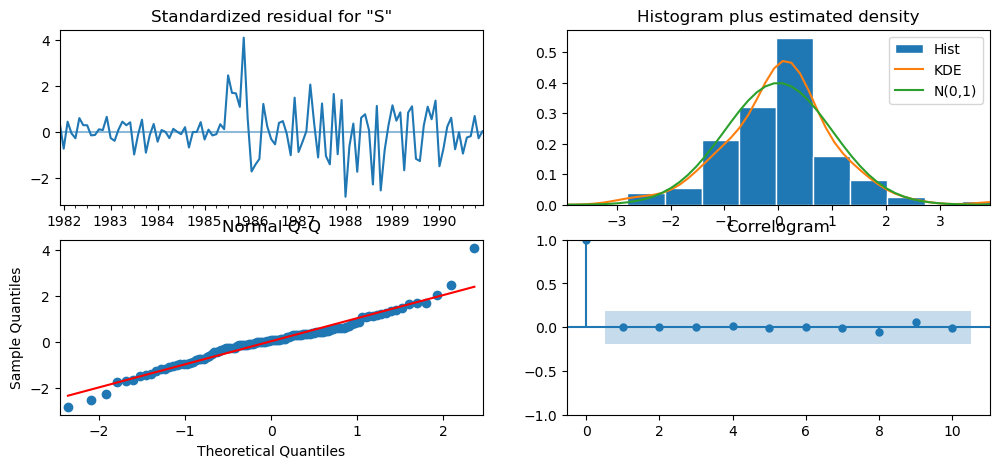

In [739]:
results_auto_SARIMA.plot_diagnostics();

In [740]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test_data))

In [741]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Shoe_Sales,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-01,232.438451,55.606872,123.450985,341.425918
1991-02-01,224.684408,64.570430,98.128691,351.240125
1991-03-01,232.932036,74.670906,86.579749,379.284322
1991-04-01,260.908816,78.769688,106.523065,415.294567
1991-05-01,219.901963,81.850236,59.478449,380.325477


In [742]:
rmse = mean_squared_error(test_data['Shoe_Sales'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test_data['Shoe_Sales'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 94.06882165833014 
MAPE: 34.38854834496713


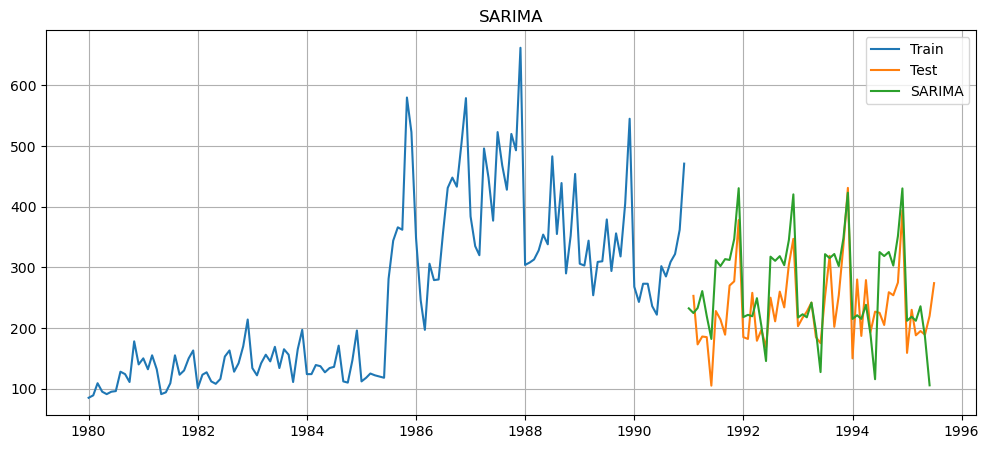

In [743]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(df_train, label='Train')
plt.plot(df_test, label='Test')

plt.plot(predicted_auto_SARIMA.predicted_mean, label='SARIMA')


plt.legend(loc='best')
plt.grid()
plt.title('SARIMA');

In [744]:
resultsDf1 = pd.DataFrame({'Test RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA'])
resultsDf = pd.concat([resultsDf, resultsDf1])
resultsDf

,Test RMSE,MAPE
LinearRegression,264.516794,122.140758
NaiveBayes,244.575066,114.443505
SimpleAverage,62.116279,21.327011
Trailing_2,42.489323,14.787482
Trailing_4,55.199732,19.835338
Trailing_6,61.684757,23.269147
Trailing_9,66.901505,24.726947
SES,195.894561,91.420744
DES,286.467010,131.556013
TES,142.698275,57.907264


# 7. Table with all models

In [746]:
resultsDf.sort_values(by='Test RMSE')

,Test RMSE,MAPE
Trailing_2,42.489323,14.787482
Trailing_4,55.199732,19.835338
Trailing_6,61.684757,23.269147
SimpleAverage,62.116279,21.327011
Trailing_9,66.901505,24.726947
SARIMA,94.068822,34.388548
"ARIMA(3,1,3)",142.136266,64.286625
TES,142.698275,57.907264
SES,195.894561,91.420744
NaiveBayes,244.575066,114.443505


# 8. Prediction of 12 month data with most accurate model

In [751]:
auto_SARIMA = sm.tsa.statespace.SARIMAX(df['Shoe_Sales'],
                                order=(1, 1, 3),
                                seasonal_order=(3, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\Sourav Maity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sourav Maity\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                        Shoe_Sales   No. Observations:                  187
Model:             SARIMAX(1, 1, 3)x(3, 0, 3, 6)   Log Likelihood                -886.401
Date:                           Wed, 01 Nov 2023   AIC                           1794.801
Time:                                   12:31:14   BIC                           1828.900
Sample:                               01-01-1980   HQIC                          1808.644
                                    - 07-01-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2327      0.416      0.559      0.576      -0.583       1.048
ma.L1         -0.7388      0.432     -1.709

In [752]:
predicted_manual_SARIMA_full_data = results_auto_SARIMA.get_forecast(steps=12)

In [753]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Shoe_Sales,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,241.697665,51.939624,139.897873,343.497458
1995-09-01,257.082113,57.931008,143.539423,370.624803
1995-10-01,252.488249,66.622542,121.910466,383.066031
1995-11-01,315.294934,71.290551,175.568021,455.021846
1995-12-01,393.655725,75.097511,246.467308,540.844141


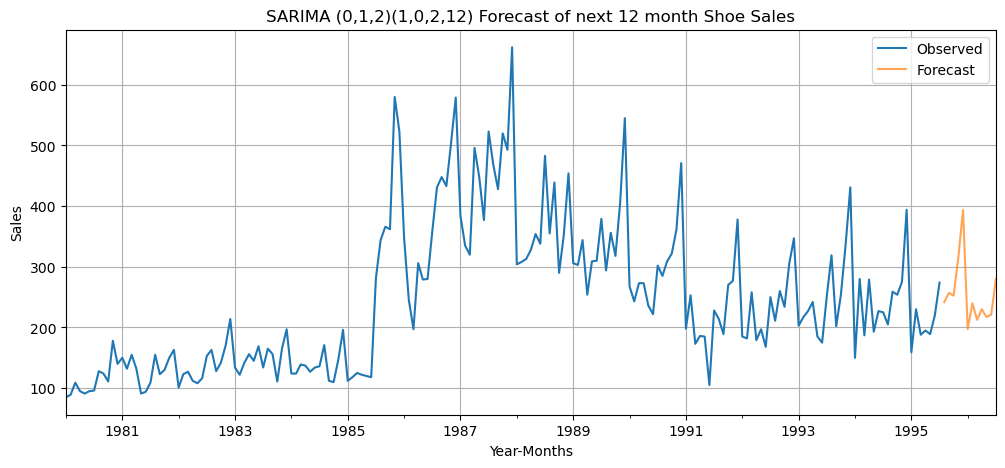

In [755]:
axis = df['Shoe_Sales'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.title("SARIMA (0,1,2)(1,0,2,12) Forecast of next 12 month Shoe Sales")
plt.legend(loc='best')
plt.grid();